In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

# Подготовка данных

In [3]:
df = pd.read_csv('community_dataset.csv')
df.shape

(269442, 9)

In [4]:
df.head()

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group


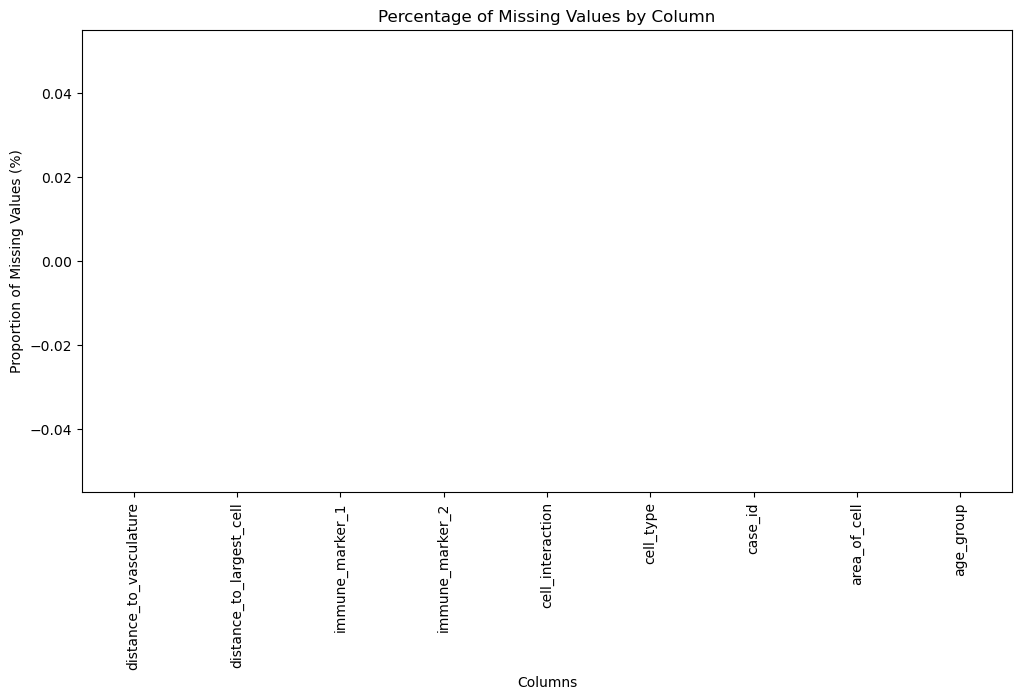

In [5]:
# Вычисляем процент пропущенных значений
percent_missing = df.isnull().mean().sort_values(ascending=False)

# Создаем тепловую карту отсортированных данных
percent_missing.plot(kind='bar', figsize=(12, 6))
plt.ylabel('Proportion of Missing Values (%)')
plt.xlabel('Columns')
plt.title('Percentage of Missing Values by Column')
plt.show()

In [6]:
# Проверка наличия дубликатов и вывод их количества
duplicate_count = df.duplicated().sum()
print("Количество дубликатов:", duplicate_count)

Количество дубликатов: 0


# Задание 1

Есть ли стат-значимость между типом клетки и:

а) Размером клетки (*area_of_cell*), добавьте 'hue' по возрастным группам.

б) Экспрессией иммунных маркеров (*immune_marker_1*, *immune_marker_2*), добавьте 'hue' по возрастным группам.

в) Дистанцией до ближайших объектов (*distance_to_vasculature*, *distance_to_largest_cell*), добавьте hue по возрастным группам.
В качестве ответов можно приводить 'box_plot'/'swarplot', где по одной оси будет тип клеток, а по другой — оцениваемая вами статистика.

## Задание 1_а

Есть ли стат-значимость между типом клетки и размером клетки (*area_of_cell*), добавьте 'hue' по возрастным группам.


In [7]:
data_1 = df[['cell_type', 'area_of_cell', 'age_group']].dropna()
data_1.shape

(269442, 3)

In [8]:
data_1.head(20)

,cell_type,area_of_cell,age_group
0,Stroma cells,185,elder_group
1,Stroma cells,209,elder_group
2,Stroma cells,254,elder_group
3,Unclassified,156,elder_group
4,Unclassified,194,elder_group
5,Unclassified,196,elder_group
6,Stroma cells,238,elder_group
7,Stroma cells,254,elder_group
8,Stroma cells,331,elder_group
9,Unclassified,140,elder_group


### Проверка выборки на нормальность

Построим график размаха (boxplot) для переменных "cell_type" (тип клетки) и "area_of_cell" (размер клетки). Используем параметр hue='age_group' для разделения данных по возрастным группам на том же графике. Это позволит визуально оценить распределение размеров клеток для различных типов клеток и возрастных групп. 

<Axes: xlabel='cell_type', ylabel='area_of_cell'>

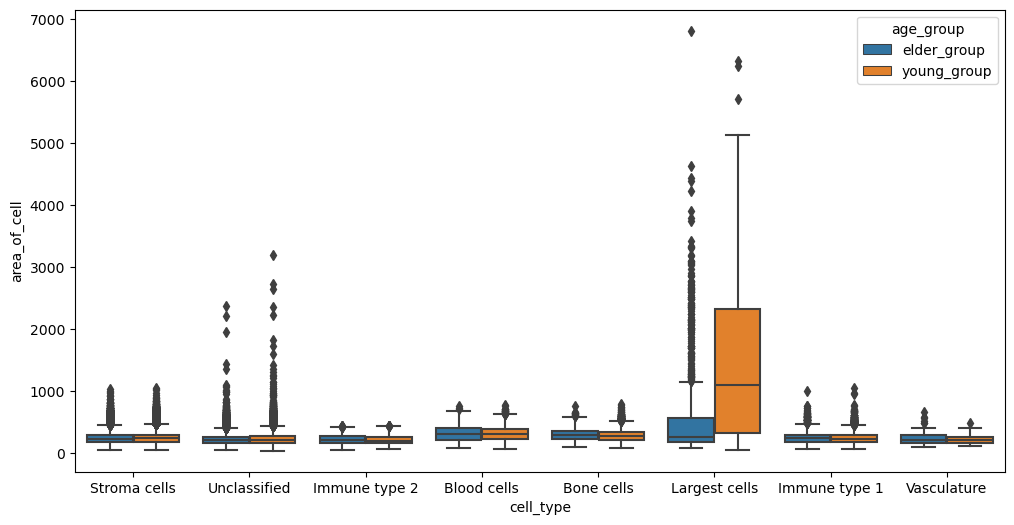

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='cell_type', y='area_of_cell', data=data_1, hue='age_group', ax=ax)

Исходя из графика, можем предположить, что выборка не имеет нормального распределения. Следует проверить ее статистическим тестом и графиками: гистограмм, графиков квантиль-квантиль.

/home/ruugi/miniconda3/envs/ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ruugi/miniconda3/envs/ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Q-Q plot of Area of Cell')

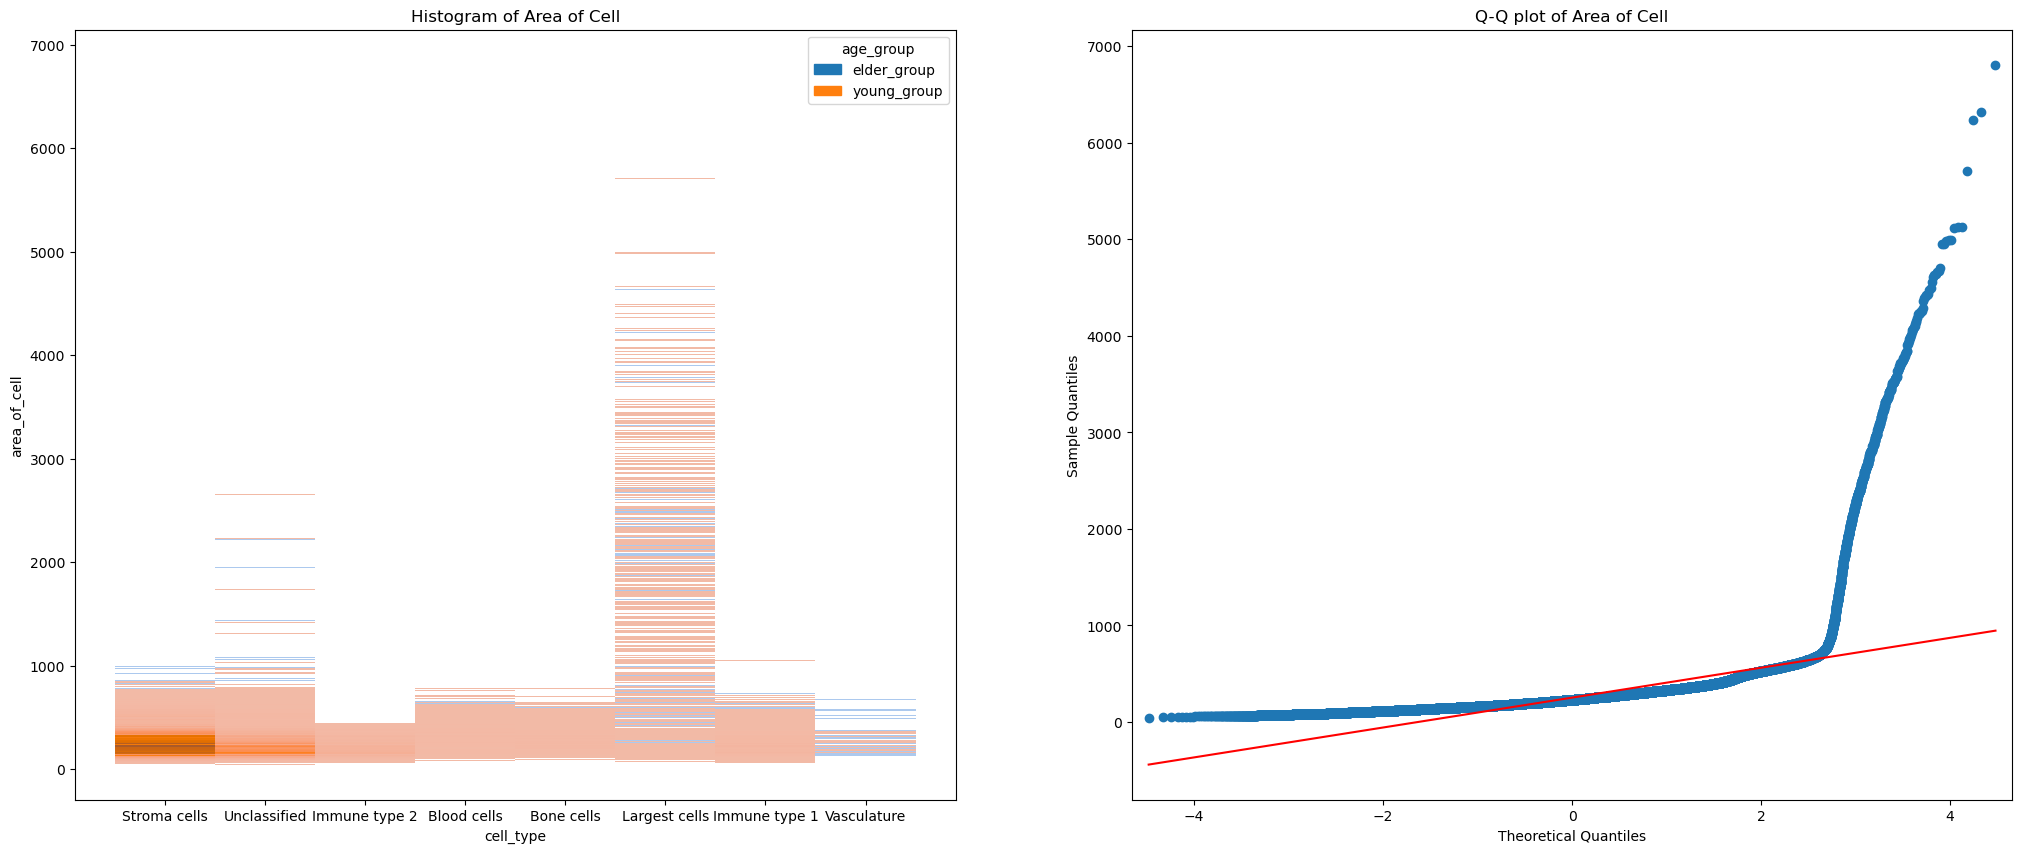

In [30]:
fig, axes = plt.subplots(1, 2,figsize=(25, 10))
sns.histplot(y='area_of_cell', x='cell_type', data=data_1, hue='age_group', ax=axes[0])
axes[0].set_title('Histogram of Area of Cell')

sm.qqplot(data_1['area_of_cell'], line='s', ax=axes[1])
axes[1].set_title('Q-Q plot of Area of Cell')


In [11]:
ks_test_stat, ks_p_value = stats.kstest(data_1['area_of_cell'], 'norm')

alpha = 0.05

print(f'alpha: {alpha}')
print(f'Kolmogorov-Smirnov Test p-value: {ks_p_value}')

if ks_p_value < alpha:
    print("Распределение является ненормальным")
else:
    print("Распределение является нормальным")


alpha: 0.05
Kolmogorov-Smirnov Test p-value: 0.0
Распределение является ненормальным


### Статистический тест

Так как данные являются не нормально распределенными для проверки гипотезы, мы воспользуемся тестом Краскела-Уолисса


In [12]:
# Группировка данных по типу клетки
groups = df.groupby('cell_type')['area_of_cell'].apply(list)

# Выполнение теста Краскела-Уоллиса

alpha = 0.05

H0 = 'Различия между типами клеток и их размерами статистически незначимы'
H1 = 'Различия между типами клеток и их размерами статистически значимы'

h_value, p_value = stats.kruskal(*groups)

# Вывод p-value для оценки статистической значимости
print(f'alpha: {alpha}')
print(f'Значение статистики теста Краскела-Уоллиса: {round(h_value, 2)}')
print(f'p-value: {p_value}')
if p_value > alpha:
    print(f'Принимаем нулевую гипотезу. {H0}')
else:
    print(f'Отвергаем нулевую гипотезу. {H1}')

alpha: 0.05
Значение статистики теста Краскела-Уоллиса: 7331.56
p-value: 0.0
Отвергаем нулевую гипотезу. Различия между типами клеток и их размерами статистически значимы


## *Оценка значимости и величины эффектов

Расчитаем коэффицент ранговой корреляции Спирмена

In [39]:
# Рассчитаем коэффициент ранговой корреляции Спирмена
# Для этого присвоим ранги количественной переменной
ranks = stats.rankdata(data_1['area_of_cell'])

# Качественная переменная должна быть закодирована в числовые значения
# Это можно сделать с помощью factorize, если еще не сделано
cell_type_codes = pd.factorize(data_1['cell_type'])[0]

# Рассчитаем коэффициент корреляции Спирмена
spearman_corr, p_val = stats.spearmanr(cell_type_codes, ranks)

print(f'Коэффициент корреляции Спирмена: {round(spearman_corr)}')
print(f'p-value: {round(p_val, 3)}')

Коэффициент корреляции Спирмена: 0
p-value: 0.0


## Задание 1_б

Есть ли стат-значимость между типом клетки и экспрессией иммунных маркеров (*immune_marker_1*, *immune_marker_2*), добавьте 'hue' по возрастным группам.

In [13]:
df_1_b = df[['cell_type', 'immune_marker_1', 'immune_marker_2', 'age_group']].dropna()
df_1_b.shape

(269442, 4)

In [14]:
df_1_b.head()

,cell_type,immune_marker_1,immune_marker_2,age_group
0,Stroma cells,10.803755,187.998971,elder_group
1,Stroma cells,11.749179,155.357076,elder_group
2,Stroma cells,15.124372,182.626888,elder_group
3,Unclassified,14.221883,158.381917,elder_group
4,Unclassified,19.978977,159.071269,elder_group


Text(0.5, 1.0, 'Boxplot of Immune Marker 2 by Cell Type and Age Group')

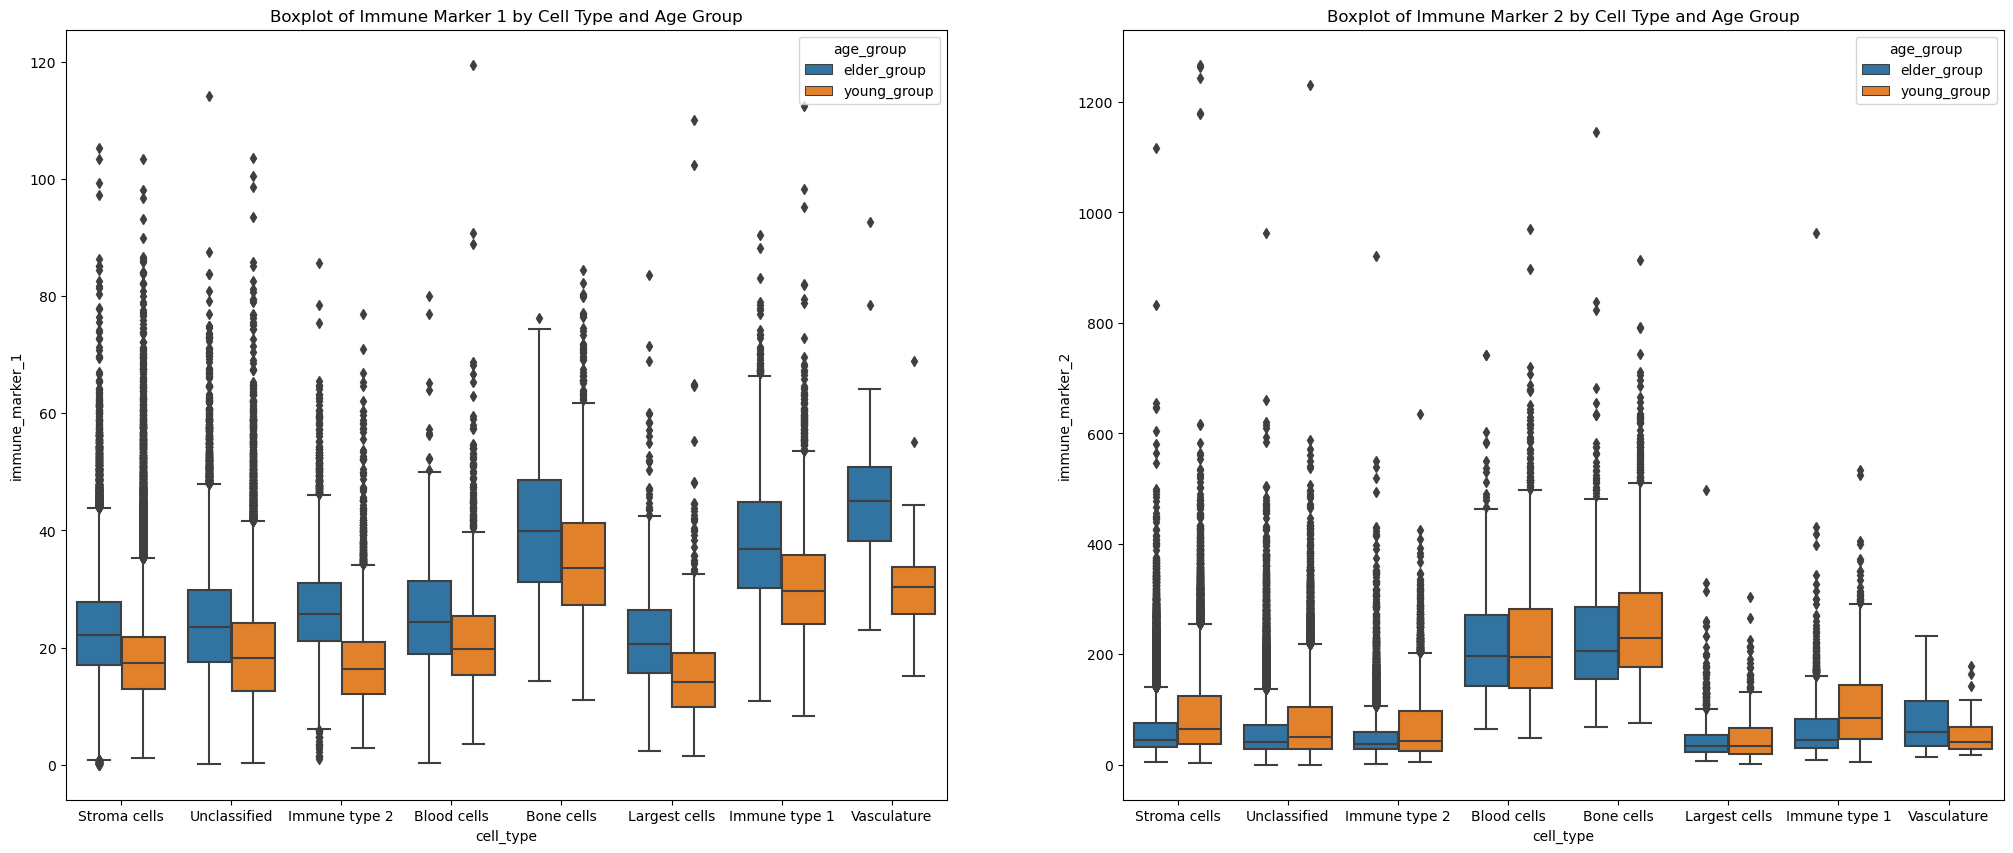

In [17]:
# Cтроим график распределения
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.boxplot(x='cell_type', y='immune_marker_1', data=df_1_b, hue='age_group', ax=axes[0])
axes[0].set_title('Boxplot of Immune Marker 1 by Cell Type and Age Group')

sns.boxplot(x='cell_type', y='immune_marker_2', data=df_1_b, hue='age_group', ax=axes[1])
axes[1].set_title('Boxplot of Immune Marker 2 by Cell Type and Age Group')


### Проверка выборки на нормальность

По графикам выше, можно преположить, что выборки не подчиняются закону нормального распределения. Для проверки распределения выборки используем статистический тест и графики: гистограммы, графики квантиль-квантиль.

/home/ruugi/miniconda3/envs/ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ruugi/miniconda3/envs/ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ruugi/miniconda3/envs/ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ruugi/miniconda3/envs/ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0.5, 1.0, 'Q-Q plot of immune_marker_2')

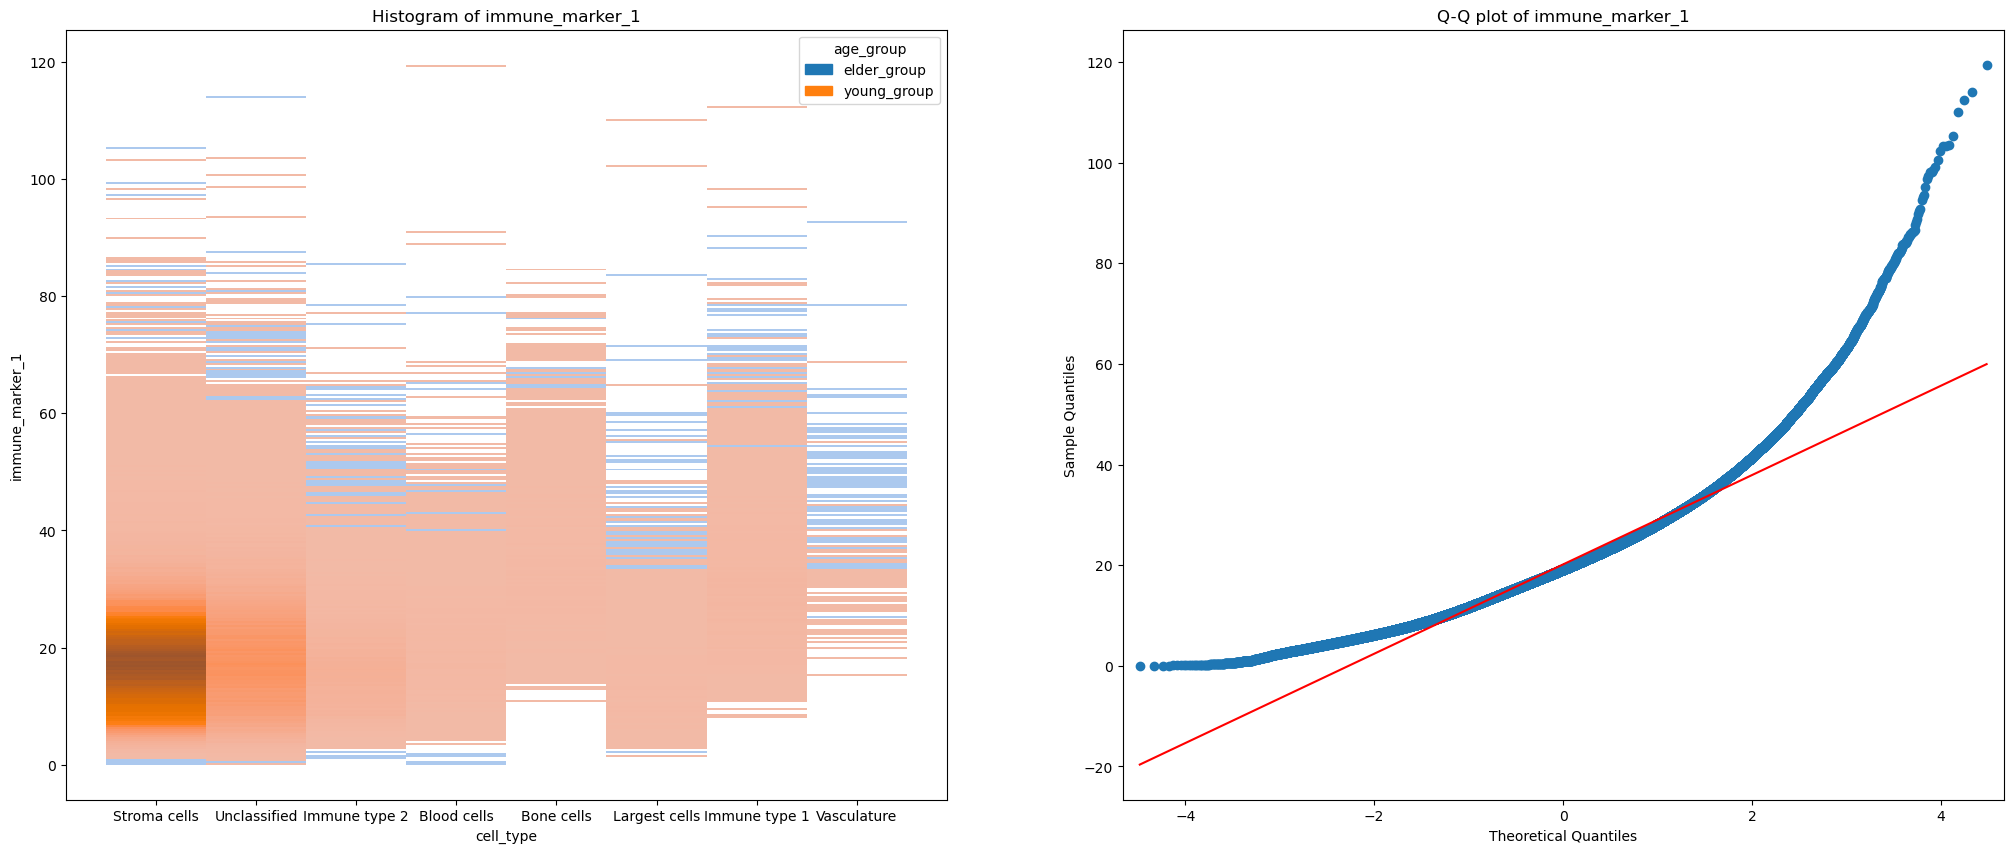

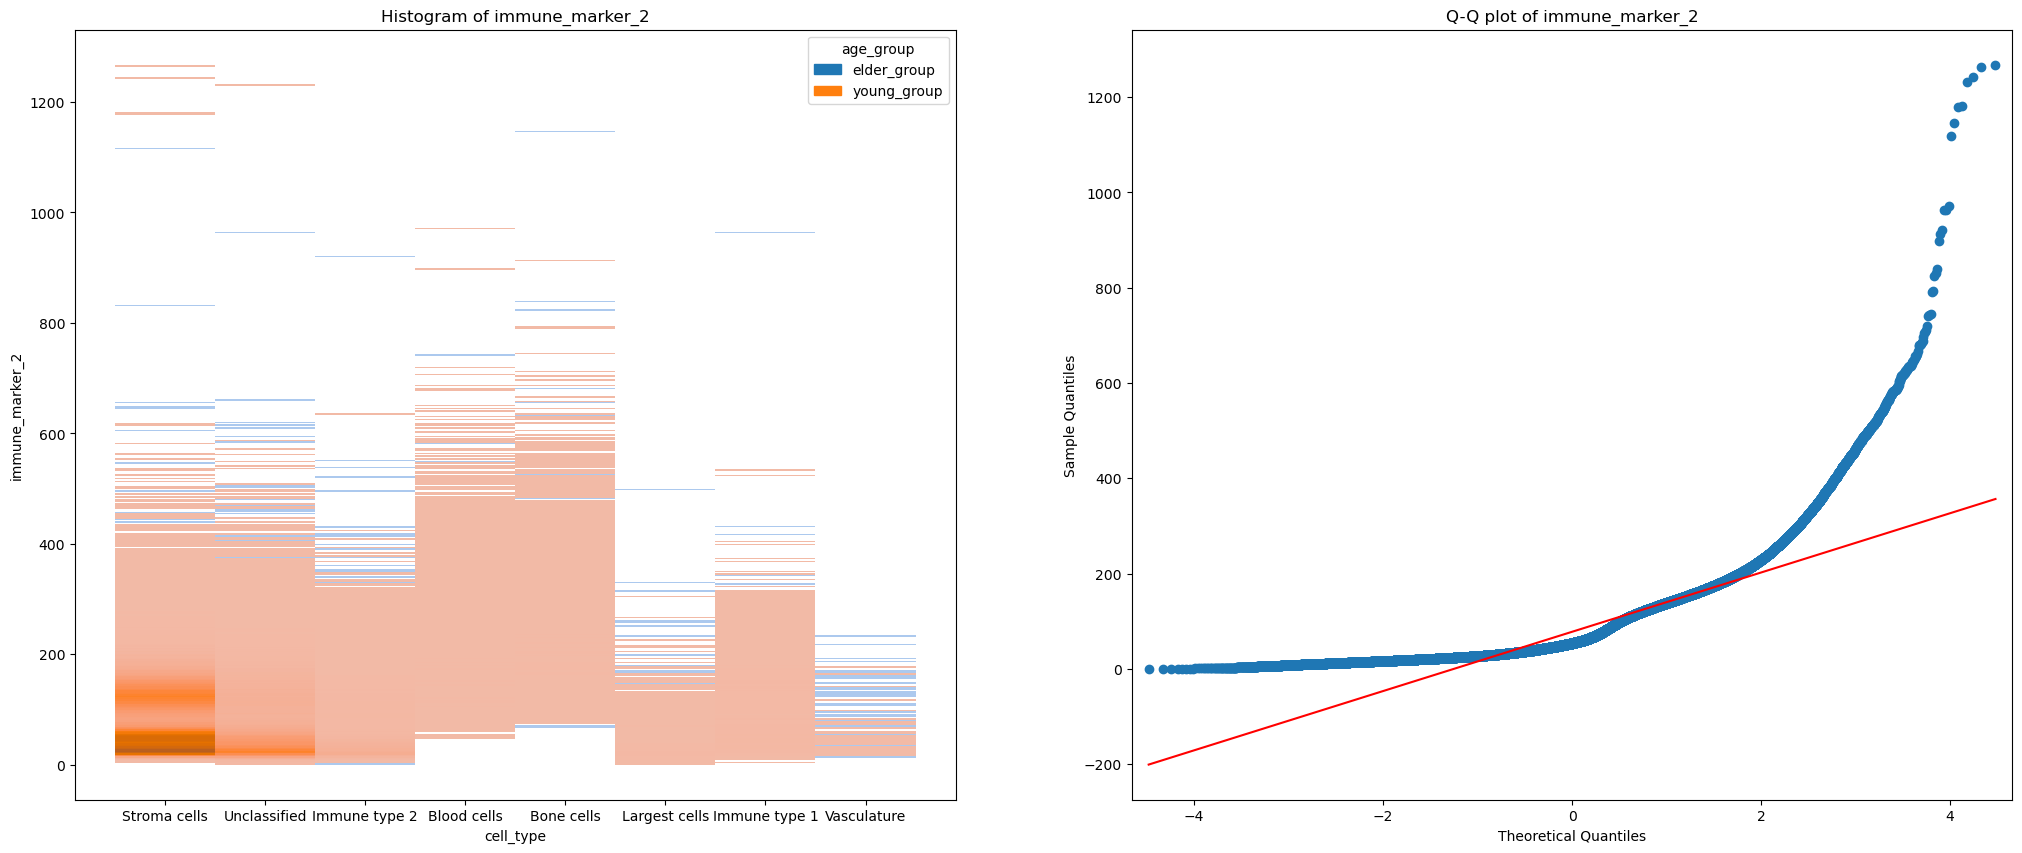

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.histplot(x='cell_type', y='immune_marker_1', data=df_1_b, hue='age_group', ax=axes[0])
axes[0].set_title('Histogram of immune_marker_1')

sm.qqplot(df_1_b['immune_marker_1'], line='s', ax=axes[1])
axes[1].set_title('Q-Q plot of immune_marker_1')

fig, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.histplot(x='cell_type', y='immune_marker_2', data=df_1_b, hue='age_group', ax=axes[0])
axes[0].set_title('Histogram of immune_marker_2')

sm.qqplot(df_1_b['immune_marker_2'], line='s', ax=axes[1])
axes[1].set_title('Q-Q plot of immune_marker_2')